In [3]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import re

params

In [56]:
file_path = 'results/evaluation.json'  # Path to the results file
model_name = 'gpt-3.5'                   # Model name, e.g., 'gpt-4'
scoring_template = 'scoring_1_10_cot_full'      # Scoring template

In [40]:
score_mapping = {
    "scoring_badges" : {
        'Novice': 10,
        'Apprentice': 9,
        'Journeyman': 8,
        'Craftsman': 7,
        'Artisan': 6,
        'Expert': 5,
        'Master': 4,
        'Sage': 3,
        'Oracle': 2,
        'Legend': 1
    },
    "scoring_grades" : {
        'Beginner': 5,
        'Intermediate': 4,
        'Proficient': 3, 
        'Advanced': 2,
        'Expert': 1  
    }
}

depending on the complexity of the llm eval score response you may need to extract the scores
manually and assign them to the `scores` list. below is an attempt to automate that process. 

read data (numeric labels)

In [50]:
with open(file_path, 'r') as file:
    data_json = json.load(file)

eval_data = data_json[model_name][scoring_template]

misspelled_percentages = []
scores = []

for item in eval_data:
    misspelled_percentages.append(item["misspelled_percentage"])
    resp = item["response"]
    try:
        score = int(resp.split(":")[1].strip())
    except ValueError:
        numbers = re.findall(r'\d+', resp)
        score = int(numbers[-1])
    scores.append(score)

read data (classification labels)

In [41]:
with open(file_path, 'r') as file:
    data_json = json.load(file)

eval_data = data_json[model_name][scoring_template]

misspelled_percentages = []
scores = []

for item in eval_data:
    misspelled_percentages.append(item["misspelled_percentage"])
    resp = item["response"]
    grade = resp.split()[-1].strip()
    score = score_mapping[scoring_template][grade]
    
    scores.append(score)

manual

In [57]:
scores = [2, 4, 3, 10, 7, 8, 10, 10, 7, 8, 7]
misspelled_percentages = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

visualize

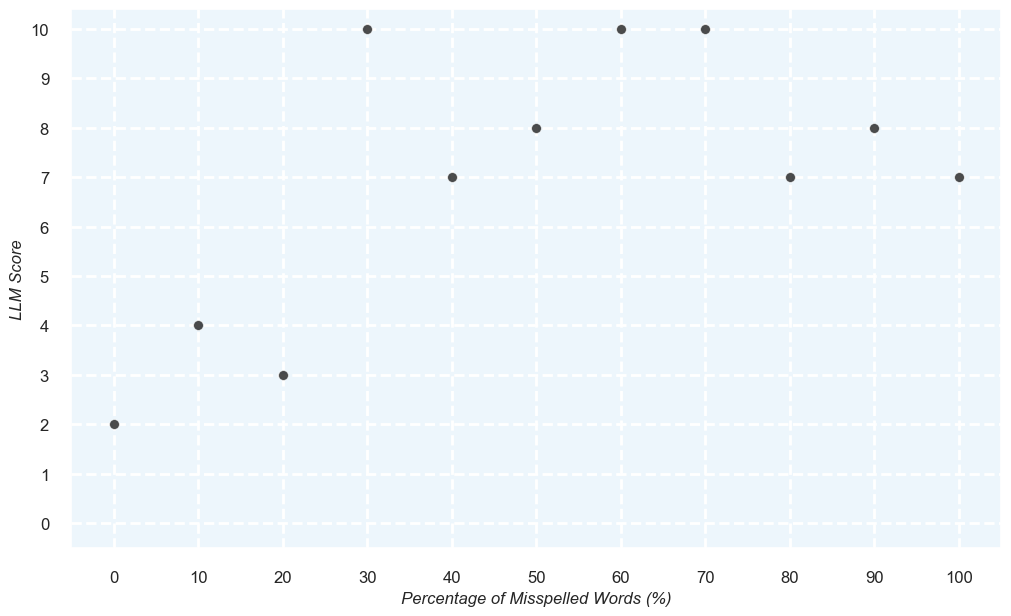

In [58]:
sns.set(style="whitegrid", palette="muted")

fig = plt.figure(figsize=(12, 7))

sns.set(rc={'axes.facecolor':'#edf6fc'})
ax = sns.scatterplot(x=misspelled_percentages, y=scores, s=50, color="black", alpha=0.7)

plt.xlabel('Percentage of Misspelled Words (%)', fontsize=12, style='italic')
plt.ylabel('LLM Score', fontsize=12, style='italic')

plt.xticks([0,10, 20, 30, 40, 50, 60, 70, 80, 90, 100], fontsize=12)
plt.yticks([0,1,2,3,4,5,6,7,8,9,10], fontsize=12)
#plt.xticks([0, 25, 50, 75, 100], fontsize=12)
#plt.yticks([1, 2, 3, 4, 5], fontsize=12)

plt.ylim(bottom=-0.5)

ax.tick_params(axis='both', which='major', pad=10)

plt.grid(True, linestyle='--', linewidth=2, alpha=1)

#plt.show()
plt.savefig(f"figures/{model_name}_{scoring_template}.png")